# Applied Econometrics (Part 5)
## Lviv Data Science Summer School

### Jozef Barunik & Luboš Hanus

**July 2019**

# Modeling the distribution:

- interest in the entire distribution


- the complete set of probabilities represents a probability forecast
    - probabilistic forecasting is a type of probabilistic classification.
    

- **approximate** the continuous distribution function by a number of points
    - number of cutoffs spaced over the unconditional sample distribution
    

- multiple cutoffs (J, js)

In [1]:
options(repr.plot.width=5, repr.plot.height=4)
## Normal distribution
x <- rnorm(100000, 0, 1)
x <- (x - mean(x))/sd(x) ## z-score

In [2]:
js = 10
probs0 = seq(0.05, 0.95, length.out=js)
emp_q = quantile(x, probs=probs0)
print(emp_q)

        5%        15%        25%        35%        45%        55%        65% 
-1.6493649 -1.0330926 -0.6728734 -0.3880317 -0.1256014  0.1269302  0.3884385 
       75%        85%        95% 
 0.6742793  1.0367498  1.6407425 


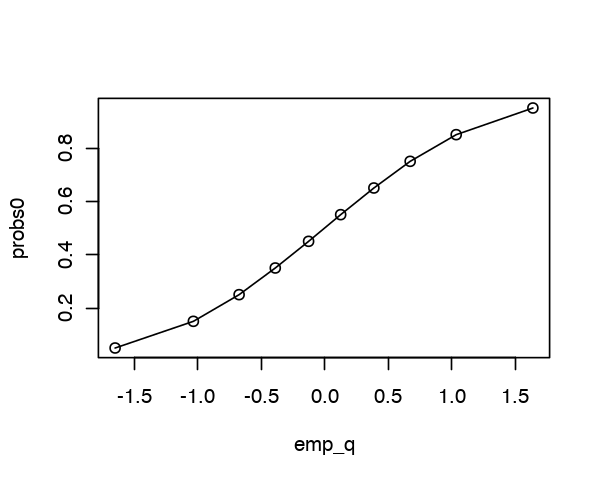

In [3]:
plot(emp_q, probs0, type="o")

**Foresi & Peracchi (1995)** estimate a collection of conditional probabilities to describe cumulative distribution of excess returns.
- Cumulative distribution function of $Y$ given $X$ is defined as
$$ F(y|x) = \Pr(Y \leq y| X = x) $$
- They extend this to multiple cutoffs $J$ to estimate distinct functions $F_1(x), \dots, F_J(x)$ for $-\infty < y_1 < \dots < y_J < \infty$.
- Set of individual logits. Unordered model.
- Any problems in our estimation? 
    - Monotonicity

In [4]:
probsE = probs0
probsE[4] = 0.90

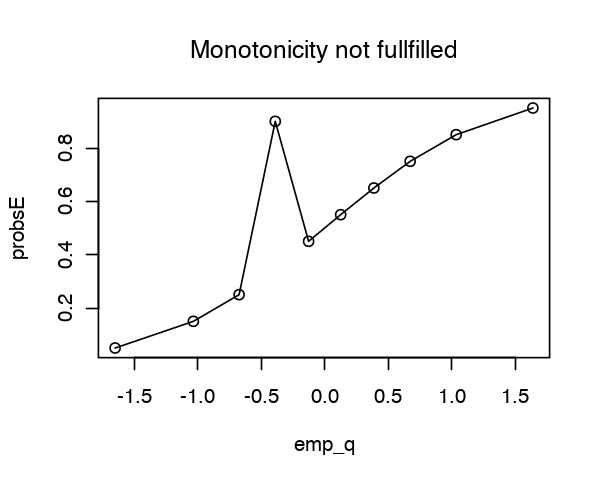

In [5]:
plot(emp_q, probsE, type="o", main="Monotonicity not fullfilled")

In [6]:
## Example
load(file="Example_banks.RData")

In [7]:
# head(ret)

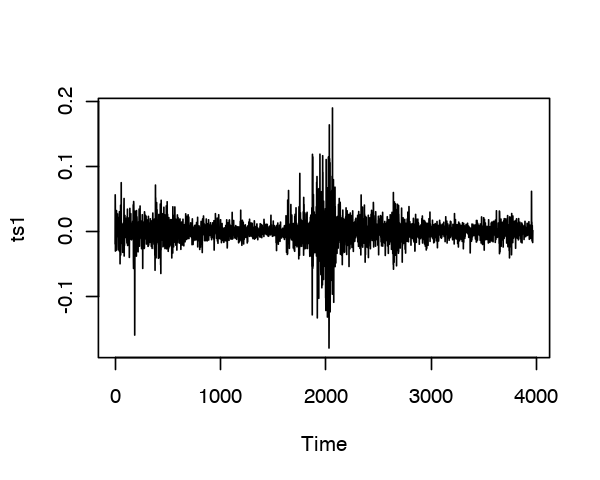

In [8]:
ts1 <- ret$USB
plot.ts(ts1)

Time-series (return) classification

- Cutoffs $c_j$ = empirical quantiles
- Meaning $x_t \leq c_j$. 
- Assigning returns into classes according to the cutoffs.
- E.g. $\alpha_j = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]$

In [9]:
nt <- length(ts1)
js <- 10
probs1 <- seq(0.05, 0.95, length.out = js)

In [10]:
emp_quant = quantile(ts1, probs = probs1)

Indicator function:

In [11]:
xt <- matrix(NA, nt, js)

for (i in 1:js) {
  xt[,i] <- (ts1 <= emp_quant[i]) * 1.0
}
head(xt)

0,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1
0,1,1,1,1,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1


In [12]:
yt1 = xt[2:nt,]
xt0 = xt[1:(nt-1),]
rv0 = log(1 + abs(ts1[1:(nt-1)]))

In [13]:
coefs_logit <- NULL

for (i in 1:js) {
  df1 <- data.frame(y1 = yt1[, i], x0 = xt0[, i], rv0)
  fit1 = glm(y1 ~ x0 + rv0, family = binomial, data = df1)
  coefs_logit <- cbind(coefs_logit, fit1$coef)
}

summary(fit1)


Call:
glm(formula = y1 ~ x0 + rv0, family = binomial, data = df1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6389   0.2602   0.2774   0.3085   2.2174  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.46932    0.29258  11.858   <2e-16 ***
x0           -0.01874    0.27320  -0.069    0.945    
rv0         -33.57120    3.63519  -9.235   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1578.6  on 3964  degrees of freedom
Residual deviance: 1474.1  on 3962  degrees of freedom
AIC: 1480.1

Number of Fisher Scoring iterations: 6


In [14]:
coefs_logit

(Intercept),-3.44925551,-2.06817292,-1.30332837,-0.76045005,-0.24612840,0.23260732,0.709530330,1.23206053,1.9820219,3.46931958
x0,0.02658578,0.06675293,0.04083802,0.02991032,-0.01157986,-0.02223626,0.001546689,0.05458222,0.0504961,-0.01874289
rv0,33.22534631,24.99936159,16.35412652,11.38551936,4.49800316,-1.82806048,-8.070050630,-14.80458410,-22.8031275,-33.57120016


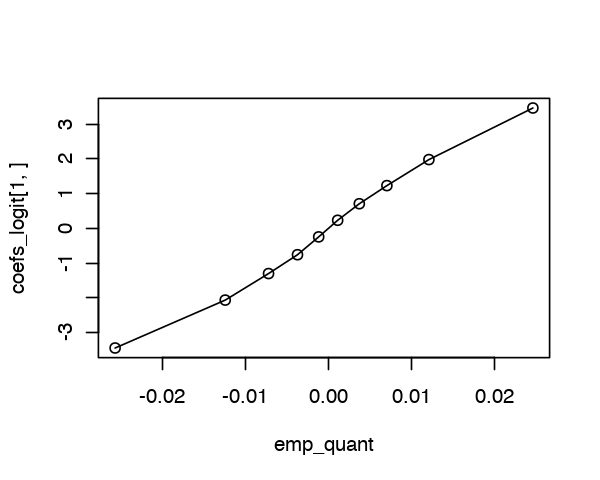

In [15]:
options(repr.plot.width=5, repr.plot.height=4)
plot(emp_quant, coefs_logit[1,], type = "o")
# plot(probs1, coefs_logit[1,], type = "o")

# An individual logit estimate and prediction
- one probability cutoff

In [16]:
## SOLO LOGIT
Q_selected = 1
df2 <- data.frame(y1 = yt1[, Q_selected], x0 = xt0[, Q_selected], rv0)
fit2 <- glm(y1 ~ x0 + rv0, family = binomial, data = df2[1:1000,])

In [17]:
df_predict <- df2[1001:1005,]
predict(fit2, df_predict, type="response")

1001       1002       1003       1004       1005 
0.03400064 0.05548998 0.04468671 0.04245720 0.04537464

When we have the collection of the logits, we can predict the entire distribution as proposed earlier.
$$F_1(x), \dots, F_J(x)$$


# Ordered logit

Ordered choice: y in {1,2,3} :

$$\Pr(y=1|x)= \Pr(u1 > y* > -inf|x)$$
$$\Pr(y=2|x)= \Pr(u2 > y* > u1  |x)$$
$$\Pr(y=3|x)= \Pr(+inf> y* > u2|x)$$

...i.e. form of censoring

Observe outcome $j$ if utility is in region $j$
$$ \Pr[y_{it}=j|x]    = Prob[y*_{it} < u_j]  -  Prob[y*_it < u_{(j-1)}]= F(u_j | x_{it}) - F(u_{(j-1)} | x_{it})$$

$$\Pr(y=1|x)=\Pr( -inf<y*<u_1  |x)= F(u_1-x'b)-0$$
$$\Pr(y=2|x)=\Pr(  u_1<y*<u_2  |x)= F(u_2-x'b)-F(u1-x'b)$$
$$\Pr(y=3|x)=\Pr(  u_2<y*<inf |x)= 1-F(u_2-x'b) $$

**A finance example:**

[Barunik & Anatolyev (2019)](https://github.com/barunik/DistributionalForecasts.jl) 

- forecast the entire predictive distribution of stock returns using **fewer** parameters than the set of separate binary choice regressions

- solved the issue of monotonicity by joining the logits and formulating one log-likelihood function


The full specification of the model for $j=1,\dots ,p$ empirical quantiles is
$$
  \Pr \{r_{t}\leq c_{j}|\mathcal{I}_{t-1}\}=\frac{\exp (\theta _{t,j})}{1+\exp (\theta _{t,j})},
$$

$$
  \theta _{t,j}=\delta _{0,j}+\delta_1 \left( \alpha
  _{j}\right) \mathbb{I}_{\{r_{t-1}\leq c_{j}\}} +\delta_2 \left( \alpha
  _{j}\right) \ln \left( 1+\left\vert r_{t-1}\right\vert \right),
$$

where $\mathbb{I}_{\{r_{t-1}\leq c_{j}\}}$ is the indicator function, and the coefficient functions

$$
  \delta_1 \left( \alpha _{j}\right) =\kappa _{0,1}+
  2 (\alpha _{j}-0.5) \cdot \kappa _{1,1 }
  +2^2 (\alpha _{j}-0.5)^2 \cdot \kappa _{2,1 },
$$

$$
    \delta _2\left( \alpha _{j}\right) =\kappa _{0,2}
    +2(\alpha _{j}-0.5)\cdot \kappa _{1,2}
    +2^{2}(\alpha _{j}-0.5)^{2}\cdot \kappa _{2,2}
    +2^{3}(\alpha _{j}-0.5)^{3}\cdot \kappa _{3,2},
$$

where $0 < \alpha_1 < \alpha_2 < \cdots < \alpha_p < 1$ are $p$ probability levels.

See paper/github.

<br><br><br>

### Are there any problems we might face?

<br><br><br>

- Many parameters and large uncertainty.
- Can we use two to three variables to explain the distribution?
- Which of explanatory variables are informative?
- Tons of data to choose from.
- Can we use all of the data?

<br><br><br><br>

# ML(E?)
<br><br><br><br>

Building on previous Foresi & Peracchi (1995) and Anatolyev & Barunik (2019)
$$
    \Pr \{r_{t}\leq c_{j}|\mathcal{I}_{t-1}\}=\Lambda(\cdot)
$$
- We change the direction and **use ML** to give us the distribution:
$$
    \Pr \{r_{t}\leq c_{j}|\mathcal{I}_{t-1}\} = g(\cdot)
$$
- to classify returns:
$$
    \Pr \{c_{j-1} < r_{t} \leq c_{j}|\mathcal{I}_{t-1}\} = g(\cdot),
$$
- to find the set of probabilities (=distribution):

$$
    \Pr \{r_{t}\leq c_{j} |\mathcal{I}_{t-1}\} = g(\cdot)
$$
  where $ - \infty < c_1 < \dots < c_J < \infty$, and $j =1,\dots,J$.

## Machine learing in play

- Ideas how to the model could look like?

Logistic Regression is a special case of a neural network
- i.e. one neuron within one hidden layer


<br><br><br><br><br><br><br>

### Ideas to find the probabilities:
- individual logits/probability regression using ML
- ML classification 0/1 for particular bin
- **ordered logit/probability estimation using ML outputting the probabilities**

In [18]:
library(keras)
library(ggplot2)
library(tibble)

load("Example_banks.RData")
ts1 <- ret[,2]

# plot.ts(ts1)

nt <- length(ts1)
js <- 5
probs <- seq(0.05, 0.95, length.out = js)
emp_quant <- quantile(ts1, probs = probs)

xt <- matrix(NA, nt, js)

for (i in 1:js) {
  xt[,i] <- (ts1 <= emp_quant[i]) * 1.0
}
xt[1:5, ]

0,1,1,1,1
0,0,0,0,0
0,0,0,0,0
1,1,1,1,1
0,1,1,1,1


In [19]:
yt1 = xt[2:nt,]
xt0 = xt[1:(nt-1),]
rv0 = log(1 + abs(ts1[1:(nt-1)]))

train_data0 <- cbind(xt0, rv0)
train_data <- train_data0[1:2000,]
train_labels <- yt1[1:2000,]

test_data <- train_data0[2001:2500,]
test_labels <- yt1[2001:2500,]

paste0("Training entries: ", nrow(train_data), ", labels: ", ncol(train_labels))

train_data[1, ] # Display sample features, notice the different scales

column_names <- c(probs, "rv")
train_df <- as_tibble(train_data)
colnames(train_df) <- column_names

# train_df

[1] "Training entries: 2000, labels: 5"

rv0 
0.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.0191089

Warning message:
“`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session.”

In [20]:
train_labels[1:5, ] # Display first 5 entries

# Test data is *not* used when calculating the mean and std.

# Normalize training data
# train_data <- scale(train_data)

# Use means and standard deviations from training set to normalize test set
# col_means_train <- attr(train_data, "scaled:center") 
# col_stddevs_train <- attr(train_data, "scaled:scale")
# test_data <- scale(test_data, center = col_means_train, scale = col_stddevs_train)

# train_data[1, ] # First training sample, normalized

0,0,0,0,0
0,0,0,0,0
1,1,1,1,1
0,1,1,1,1
0,0,1,1,1


In [21]:

build_model <- function() {
  
  model <- keras_model_sequential() %>%
    layer_dense(units = 1,
                input_shape = dim(train_data)[2],
#                 kernel_regularizer = regularizer_l1(l = 0.01),
               ) %>%
    layer_dense(units = 16) %>%
    layer_dense(units = js, activation = "sigmoid")
  
  model %>% compile(
    loss = "mse",
    # optimizer = optimizer_rmsprop(),
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )
  
  model
}

model <- build_model()
model %>% summary()

# Display training progress by printing a single dot for each completed epoch.
print_dot_callback <- callback_lambda(
  on_epoch_end = function(epoch, logs) {
    if (epoch %% 80 == 0) cat("\n")
    cat(".")
  }
)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 1)                       7           
________________________________________________________________________________
dense_1 (Dense)                     (None, 16)                      32          
________________________________________________________________________________
dense_2 (Dense)                     (None, 5)                       85          
Total params: 124
Trainable params: 124
Non-trainable params: 0
________________________________________________________________________________



..................................................

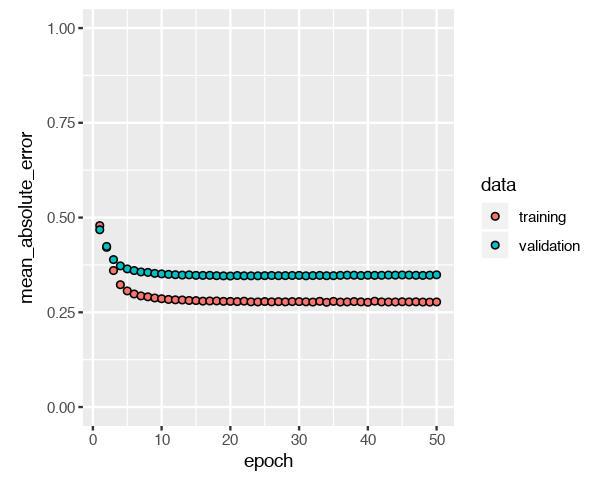

In [22]:
epochs <- 50

# Fit the model and store training stats
history <- model %>% fit(
  train_data,
  train_labels,
  epochs = epochs,
  validation_split = 0.2,
  verbose = 0,
  callbacks = list(print_dot_callback)
)

plot(history, metrics = "mean_absolute_error", smooth = FALSE) +
  coord_cartesian(ylim = c(0, 1))


..................................................

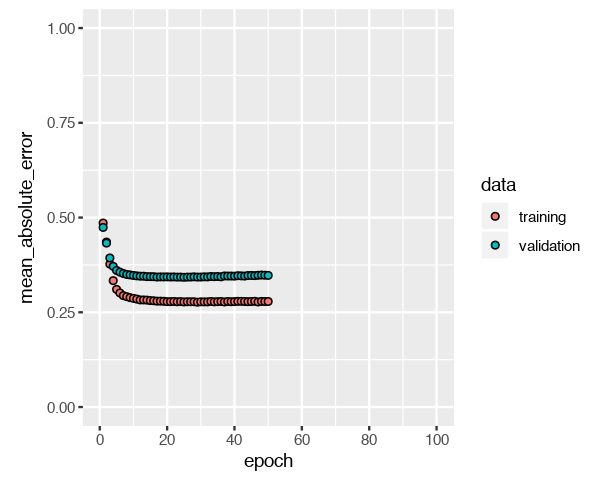

In [23]:
# The patience parameter is the amount of epochs to check for improvement.
early_stop <- callback_early_stopping(monitor = "val_loss", patience = 20)

model <- build_model()
history <- model %>% fit(
  train_data,
  train_labels,
  epochs = epochs,
  validation_split = 0.2,
  verbose = 0,
  callbacks = list(early_stop, print_dot_callback)
)

plot(history, metrics = "mean_absolute_error", smooth = FALSE) +
  coord_cartesian(xlim = c(0, 100), ylim = c(0, 1))

# plot(history, metrics = "mean_squared_error", smooth = FALSE) +
#   coord_cartesian(xlim = c(0, 150), ylim = c(0, 1))

In [24]:
c(loss, mae) %<-% (model %>% evaluate(test_data, test_labels, verbose = 0))

paste0("Mean absolute error on test set: ", sprintf("%.2f", mae * 1000))

[1] "Mean absolute error on test set: 335.90"

0.05,0.275,0.5,0.725,0.95
0.14600015,0.3301913,0.5099357,0.6488822,0.8473306
0.03391424,0.2561826,0.5107532,0.7377284,0.9609944
0.13977084,0.3276479,0.5099619,0.6519513,0.8534237
0.15092313,0.3321452,0.5099155,0.6465241,0.8425269
0.14168380,0.3284378,0.5099538,0.6509982,0.8515508
0.13872862,0.3272142,0.5099664,0.6524747,0.8544449
0.03384447,0.2560906,0.5107543,0.7378378,0.9610695
0.02628313,0.2450062,0.5108889,0.7509941,0.9692806
0.03310968,0.2551118,0.5107660,0.7390018,0.9618617
0.13788612,0.3268617,0.5099701,0.6528999,0.8552705


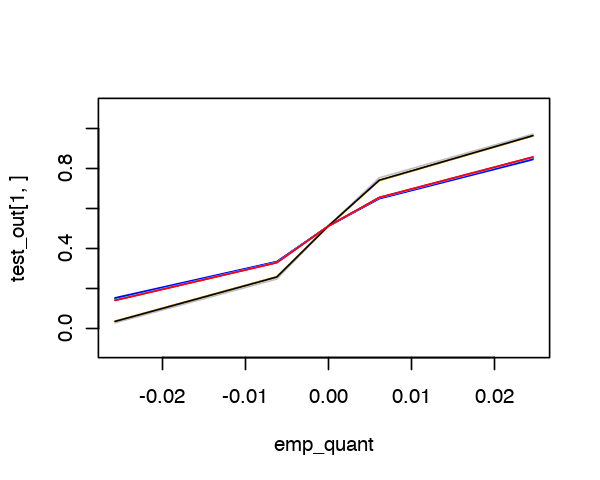

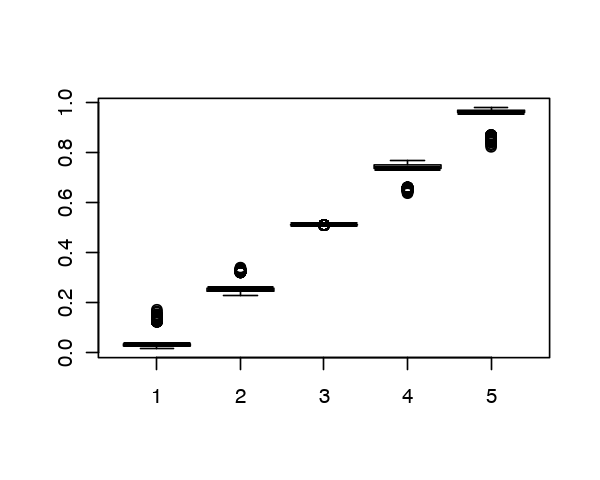

In [25]:
# PREDICT
test_predictions <- model %>% predict(test_data)
test_out <- test_predictions[1:10,]
colnames(test_out) <- probs
test_out
plot(x = emp_quant, y = test_out[1,], ylim = c(-0.1, 1.1), type="l")
for(i in 2:10) {
  lines(x = emp_quant, test_out[i,], col=i)
}

boxplot(test_predictions)

### Excercise:
- classification of returns - 2nd scenario